In [9]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from math import sqrt
import scipy.stats as ss
import scipy.optimize as opt
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

import plotly.tools as tls

In [3]:
start_date = datetime(2017,1,1)
end_date = datetime.today()

stock = yf.download('TSLA', start_date, end_date)
stock.reset_index(inplace = True)

#competitor 1. RACE defined
comp1 = yf.download('RACE', start_date, end_date)
comp1.reset_index(inplace = True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1697,2023-10-02,244.809998,254.279999,242.619995,251.600006,251.600006,123810400
1698,2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300
1699,2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600
1700,2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988,119159200
1701,2023-10-06,253.979996,261.649994,250.649994,260.529999,260.529999,117947000


In [5]:
comp1.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1702,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000,1.702000e+03
mean,2020-05-20 08:53:01.198589952,175.266776,176.742112,173.803604,175.265904,172.012632,4.289318e+05
min,2017-01-03 00:00:00,57.770000,58.500000,57.560001,58.279999,55.351608,5.380000e+04
25%,2018-09-11 06:00:00,126.020002,127.245003,125.262751,126.300003,121.760973,2.461250e+05
50%,2020-05-20 12:00:00,171.250000,172.639999,169.430000,171.084999,167.309578,3.434500e+05
75%,2022-01-26 18:00:00,213.277504,215.163746,211.774994,213.557499,210.831749,5.002500e+05
max,2023-10-06 00:00:00,328.489990,329.880005,327.619995,328.779999,328.779999,6.443500e+06
std,NaN,61.161514,61.552122,60.746952,61.132693,62.061676,3.447978e+05


In [ ]:
###2.  transformation: log of returns for GARCH

In [6]:
stock['Typical_Price'] = stock[['High', 'Low', 'Close']].mean(axis = 1)
stock['lRETS'] = (np.log(stock.Close) - np.log(stock.Close.shift(1))) * 100.
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Typical_Price,lRETS
0,2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,14.406222,NaN
1,2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,14.873333,4.505472
2,2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,15.026222,-0.105786
3,2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,15.217111,0.991755
4,2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,15.360000,0.986346


In [7]:
comp1['Typical_Price'] = comp1[['High', 'Low', 'Close']].mean(axis = 1)
comp1['lRETS'] = (np.log(comp1.Close) - np.log(comp1.Close.shift(1))) * 100.
comp1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Typical_Price,lRETS
0,2017-01-03,59.160000,59.259998,58.349998,58.939999,55.978439,546700,58.849998,NaN
1,2017-01-04,58.840000,59.480000,58.790001,59.410000,56.424824,373000,59.226667,0.794261
2,2017-01-05,59.439999,59.880001,59.341000,59.360001,56.377338,304800,59.527000,-0.084195
3,2017-01-06,58.970001,59.160000,58.810001,58.939999,55.978439,280500,58.970000,-0.710066
4,2017-01-09,57.770000,58.500000,57.560001,58.279999,55.351608,409300,58.113333,-1.126099


C:\Users\aksha\AppData\Local\Temp\ipykernel_25676\4170827596.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock['lRETS'].dropna(), ax = axes[0])
C:\Users\aksha\AppData\Local\Temp\ipykernel_25676\4170827596.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(comp1['lRETS'].dropna(), ax = a

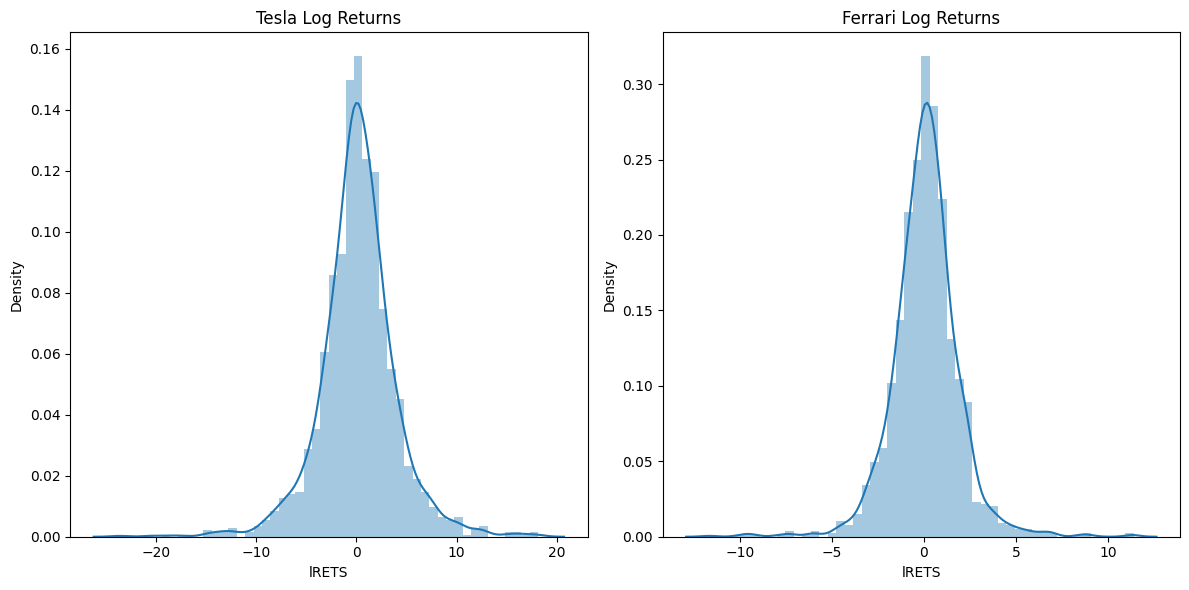

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

sns.distplot(stock['lRETS'].dropna(), ax = axes[0])
axes[0].set_title('Tesla Log Returns')

sns.distplot(comp1['lRETS'].dropna(), ax = axes[1])
axes[1].set_title('Ferrari Log Returns')
plt.tight_layout()
plt.show()

Defining the GARCH Model and Likelihood Function:

In [10]:
def GARCH(Y):
    "Initialize Params:"
    mu = param0[0]
    omega = param0[1]
    alpha = param0[2]
    beta = param0[3]
    T = Y.shape[0]
    GARCH_Dens = np.zeros(T)
    sigma2 = np.zeros(T)
    F = np.zeros(T)
    v = np.zeros(T)
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]);
        F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t] = sigma2[t]
        GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+(1/2)*(F[t]/v[t])
        Likelihood = np.sum(GARCH_Dens[1:-1])
    return Likelihood

In [11]:
def GARCH_Prod(params, Y0, T):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    Y = np.zeros(T)
    sigma2 = np.zeros(T)
    Y[0] = Y0
    sigma2[0] = 0.0001
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]);
        Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    return Y

In [12]:
Y = stock['lRETS'].dropna()
T = len(Y)

param0 = np.array([0.1, 0.6, 0.15, 0.5])
param_star = opt.minimize(GARCH, param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})

Y_GARCH = GARCH_Prod(param_star.x, Y[1], T)
timevec = np.linspace(1, T, T)

import plotly.graph_objects as go

def plot_garch(timevec, actual, predicted, title='GARCH Model'):

  fig = go.Figure()

  fig.add_trace(go.Scatter(
      x=timevec,  
      y=actual,
      mode='lines',
      name='Actual'
  ))

  fig.add_trace(go.Scatter(
      x=timevec, 
      y=predicted,
      mode='lines',
      name='Predicted'
  ))

  fig.update_layout(
      title=title,
      xaxis_title='Time',
      yaxis_title='Value'
  )

  return fig


fig = plot_garch(timevec, Y, Y_GARCH, 'GARCH for TSLA')
fig.show()

         Current function value: 1.401204
         Iterations: 1
         Function evaluations: 122
         Gradient evaluations: 22


C:\Users\aksha\AppData\Local\Temp\ipykernel_25676\2576343842.py:5: OptimizeWarning:

Unknown solver options: xtol



In [13]:
GARCH_stock = pd.DataFrame({'Actual':list(Y), 'Predicted':list(Y_GARCH)})
GARCH_stock

,Actual,Predicted
0,4.505472,4.505472
1,-0.105786,-0.183402
2,0.991755,1.311859
3,0.986346,0.524338
4,-0.611516,0.558867
...,...,...
1696,0.550001,-0.079433
1697,-2.035686,-0.086161
1698,5.764958,0.006989
1699,-0.425939,-1.167642


In [14]:
RMS_stock = sqrt(mean_squared_error(GARCH_stock['Actual'], GARCH_stock['Predicted']))
RMS_stock

4.0623344617523545

In [16]:
Y = comp1['lRETS'].dropna()
T = len(Y)

param0 = np.array([0.18, 0.27, 0.15, 0.4])
param_star = opt.minimize(GARCH, param0, method = 'BFGS' , options = {'xtol' : 1e-8, 'disp' : True})
Y_GARCH = GARCH_Prod(param_star.x,Y[1],T)
timevec = np.linspace(1,T,T)

'''fig = plt.figure(figsize = (14,6))
plt.plot(timevec, Y, 'r-', label = 'Actual')
plt.plot(timevec, Y_GARCH, 'b:', label = 'Predicted')

plt.legend(loc = 'upper right')
plt.title("GARCH Model for RACE")
plt.show()'''


import plotly.graph_objects as go

def plot_garch(timevec, actual, predicted, title='GARCH Model'):

  fig = go.Figure()

  fig.add_trace(go.Scatter(
      x=timevec,  
      y=actual,
      mode='lines',
      name='Actual'
  ))

  fig.add_trace(go.Scatter(
      x=timevec, 
      y=predicted,
      mode='lines',
      name='Predicted'
  ))

  fig.update_layout(
      title=title,
      xaxis_title='Time',
      yaxis_title='Value'
  )

  return fig


fig = plot_garch(timevec, Y, Y_GARCH, 'GARCH for RACE')
fig.show()

         Current function value: -2.190844
         Iterations: 0
         Function evaluations: 127
         Gradient evaluations: 23


C:\Users\aksha\AppData\Local\Temp\ipykernel_25676\2517798561.py:5: OptimizeWarning:

Unknown solver options: xtol



In [18]:
GARCH_comp1 = pd.DataFrame({'Actual':list(Y), 'Predicted':list(Y_GARCH)})
GARCH_comp1

,Actual,Predicted
0,0.794261,0.794261
1,-0.084195,0.896436
2,-0.710066,-0.483311
3,-1.126099,0.089311
4,1.193944,0.601763
...,...,...
1696,0.354648,0.319689
1697,-0.690197,0.612838
1698,1.696613,1.551706
1699,0.120097,-0.052148


In [19]:
RMS_comp1 = sqrt(mean_squared_error(GARCH_comp1['Actual'], GARCH_comp1['Predicted']))
RMS_comp1

1.9827903682654526

In [20]:
y_pred = [] * 1000

for i in range(len(GARCH_stock)+1):
    if i == 0:
        y_pred.append(math.exp(GARCH_stock['Predicted'][i]/100) * stock['Close'][i])
    else:
        y_pred.append(math.exp(GARCH_stock['Predicted'][i-1]/100) * stock['Close'][i-1])

In [21]:
stock_Pred = pd.DataFrame({'Actual_Close_Price': stock['Close'], 'Predicted_Close_Price': list(y_pred), 'Date': stock.index})
stock_Pred.set_index('Date', inplace = True)

In [22]:
stock_Pred

,Actual_Close_Price,Predicted_Close_Price
Date,,
0,14.466000,15.132667
1,15.132667,15.132667
2,15.116667,15.104938
3,15.267333,15.316283
4,15.418667,15.347596
...,...,...
1697,251.600006,250.021324
1698,246.529999,251.383318
1699,261.160004,246.547229


In [23]:
'''TSLA_Pred[['Actual_Close_Price', 'Predicted_Close_Price']].loc[:].plot(figsize = (15, 6), style = ['-', '--'], title = 'Actual vs Predicted')
fig = plt.figure(figsize = (15, 6))
plt.plot(timevec, Y, 'r-', label = 'Actual')
plt.plot(timevec, Y_GARCH, 'b:', label = 'Predicted')
plt.legend(loc = 'upper right')
plt.title("GARCH Model")
plt.show() 
'''
import plotly.graph_objects as go

# Actual and predicted data
actual = stock_Pred['Actual_Close_Price'] 
predicted = stock_Pred['Predicted_Close_Price']

# Create figure
fig = go.Figure()

# Add actual trace
fig.add_trace(go.Scatter(
    x=actual.index,
    y=actual,
    mode='lines',
    name='Actual'
)) 

# Add predicted trace  
fig.add_trace(go.Scatter(
    x=predicted.index,
    y=predicted,  
    mode='lines',
    name='Predicted'
))

# Set title
fig.update_layout(
    title='Actual vs Predicted',
    xaxis_title='Date',
    yaxis_title='Price'
)

# Show figure
fig.show()



# Create figure
fig_G = go.Figure()

# Add actual trace
fig_G.add_trace(go.Scatter(
  x=timevec,
  y=Y,
  mode='lines',
  name='Actual'
))

# Add predicted trace
fig_G.add_trace(go.Scatter(
  x=timevec,
  y=Y_GARCH,
  mode='lines', 
  name='Predicted'
))

# Update layout
fig_G.update_layout(
  title='GARCH Model',
  xaxis_title='Time',
  yaxis_title='Value'  
)

# Show figure
fig_G.show() 

Trading Strategy



In [25]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(stock_Pred)-1):
    if stock_Pred['Predicted_Close_Price'][i+1] > stock_Pred['Actual_Close_Price'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / stock_Pred['Actual_Close_Price'][i])
            balance = int(amount % stock_Pred['Actual_Close_Price'][i])
            portfolio = stocks * stock_Pred['Actual_Close_Price'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:', stock_Pred['Actual_Close_Price'][i] , 'Action:', action[i], 'Portfolio:', round(portfolio,2), 'Stocks:', stocks, 'Balance_init:', balance, 'Total($)', round(amount,2))
            Portfolio.append(round(portfolio, 5))
            Amount.append(round(amount, 0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * stock_Pred['Actual_Close_Price'][i]
            amount = portfolio + balance
            print('Stock:', stock_Pred['Actual_Close_Price'][i], 'Action:',action[i], 'Portfolio:', round(portfolio,2), 'Stocks:', stocks, 'Balance_init:', balance, 'Total($)', round(amount,2))
            Portfolio.append(round(portfolio, 5))
            Amount.append(round(amount, 0))
            Stocks.append(stocks)

    elif stock_Pred['Predicted_Close_Price'][i+1] < stock_Pred['Actual_Close_Price'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * stock_Pred['Actual_Close_Price'][i]
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:', stock_Pred['Actual_Close_Price'][i], 'Action:', action[i], 'Portfolio:', round(portfolio,2), 'Stocks:', stocks, 'Balance_init:', balance, 'Total($)', round(amount,2))
            Portfolio.append(round(portfolio, 5))
            Amount.append(round(amount, 0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',stock_Pred['Actual_Close_Price'][i], 'Action:', action[i], 'Portfolio:', round(portfolio,2), 'Stocks:', stocks, 'Balance_init:', balance, 'Total($)', round(amount,2))
            Portfolio.append(round(portfolio, 5))
            Amount.append(round(amount, 0))
            Stocks.append(stocks)

    print('\n')

Stock: 14.465999603271484 Action: Buy Portfolio: 9996.01 Stocks: 691 Balance_init: 3 Total($) 9999.01


Stock: 15.13266658782959 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10459.67


Stock: 15.116666793823242 Action: Buy Portfolio: 10445.62 Stocks: 691 Balance_init: 14 Total($) 10459.62


Stock: 15.267333030700684 Action: Bought--Holding Portfolio: 10549.73 Stocks: 691 Balance_init: 14 Total($) 10563.73


Stock: 15.41866683959961 Action: Bought--Holding Portfolio: 10654.3 Stocks: 691 Balance_init: 14 Total($) 10668.3


Stock: 15.324666976928711 Action: Bought--Holding Portfolio: 10589.34 Stocks: 691 Balance_init: 14 Total($) 10603.34


Stock: 15.315333366394043 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10596.9


Stock: 15.305999755859375 Action: Buy Portfolio: 10591.75 Stocks: 692 Balance_init: 5 Total($) 10596.75


Stock: 15.850000381469727 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 Total($) 10973.2


Stock: 15.70533275604248 Action: Buy P

In [26]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price': stock['Close'][1:],
                               'Predicted_Close_Price': list(y_pred[1:]),
                               'Date': stock['Date'][1:],
                               'Action': action,
                               'Amount($)':Amount,
                               'Portfolio($)': Portfolio,
                               'Stocks': Stocks})

Strategy_Result.tail()

,Actual_Close_Price,Predicted_Close_Price,Date,Action,Amount($),Portfolio($),Stocks
1697,251.600006,250.021324,2023-10-02,Sell,31471.0,0.00000,0
1698,246.529999,251.383318,2023-10-03,Price-Prediction-Already-Lower,31471.0,0.00000,0
1699,261.160004,246.547229,2023-10-04,Buy,31470.0,31309.30984,127
1700,260.049988,258.128325,2023-10-05,Sell,33328.0,0.00000,0
1701,260.529999,259.805592,2023-10-06,Price-Prediction-Already-Lower,33328.0,0.00000,0


In [27]:
#Strategy_Result[['Actual_Close_Price', 'Predicted_Close_Price']].loc[:].plot(figsize = (15, 6), style = ['-', '--'], title = 'Actual vs Predicted')
#Strategy_Result[['Amount($)']].iloc[0:].plot(figsize = (15, 4), style = ['-g'], title = 'Total Amount')


import plotly.graph_objects as go

# Actual and predicted data
actual = Strategy_Result['Actual_Close_Price'] 
predicted = Strategy_Result['Predicted_Close_Price']
amount= Strategy_Result['Amount($)']
date=Strategy_Result['Date']

# Create figure
fig = go.Figure()

# Add actual trace
fig.add_trace(go.Scatter(
    x=date,
    y=actual,
    mode='lines',
    name='Actual'
)) 

# Add predicted trace  
fig.add_trace(go.Scatter(
    x=date,
    y=predicted,  
    mode='lines',
    name='Predicted'
))

# Set title
fig.update_layout(
    title='Actual vs Predicted',
    xaxis_title='Date',
    yaxis_title='Price'
)

# Show figure
fig.show()

figt=go.Figure()

figt.add_trace(go.Scatter(
    x=date,
    y=amount,
    mode='lines',
    name='Actual'
))

# Set title
figt.update_layout(
    title='Total Amount',
    xaxis_title='Date',
    yaxis_title='Price'
)

figt.show()

In [28]:
Profit = (Amount[-1] / 10000) - 1  # Assuming Amount[-1] represents the final amount
Profit_percent = Profit * 100

print('Initial Investment: $10,000')
print('Final Amount:', Amount[-1], '$')
print('Profit Percentage:', Profit_percent, '%')

Initial Investment: $10,000
Final Amount: 33328.0 $
Profit Percentage: 233.28000000000003 %
